In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
EMPTY, WALL, TARGET, USED = ".","X","T","o"
c  = pd.Series({"EMPTY": ".", "WALL":"X", "TARGET":"T", "USED":"o"})
ci = pd.Series({".": 0, "X": 255, "T":100, "o":200})

def plot_map(grid,p=[]):
    plt.imshow(np.r_[[[ci[i] for i in j] for j in grid]], alpha=.5)
    if(len(p)>0):
        for i in range(len(p)-1):
            plt.plot([p[i][1],p[i+1][1]],[p[i][0],p[i+1][0]], color="black", lw=4)    
        plt.title("path length = %d"%len(p))

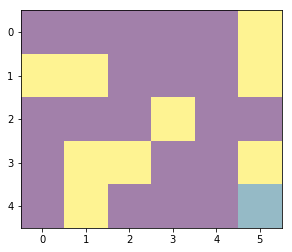

In [3]:
grid = [".....X",
        "XX...X",
        "...X..",
        ".XX..X",
        ".X...T"]

plot_map(grid)

# Breath First Search

This is **breadth first**. We put the initial node into the queue. Then repeat this procedure until visit the goal node or visit all available nodes: take the first from the queue, check if it was visited or not, check if it's the goal, put all neighbours in the end of the queue, repeat. For each step we track not only the nodes, but directions and the path for the current node too.

- does it give the best answer?


See [here](http://bryukh.com/labyrinth-algorithms/).

In [4]:
from collections import deque

def bfs_search(grid, verbose=True):
    n_iterations   = 0
    max_queue_len  = 0
    start = (0, 0)
    queue = deque([([], start)])
    visited = set()
    while queue:
        n_iterations += 1
        max_queue_len = max_queue_len if len(queue) < max_queue_len else len(queue)
        path, (y,x) = queue.popleft()
        if grid[y][x] == c.TARGET:
            if verbose:
                print "n_iterations %d, max_queue_len %d"%(n_iterations, max_queue_len)
            return path+[(y,x)]
        if (y,x) in visited:
            continue
        visited.add((y,x))
        moves = [ [y,x+1], [y-1,x], [y,x-1], [y+1,x]]
        for move in moves:
            my,mx = move
            if mx>=0 and mx<len(grid[0]) and my>=0 and my<len(grid) and grid[my][mx]!=c.WALL:                
                queue.append((path + [(y,x)], move))
    return []

n_iterations 39, max_queue_len 8
success True


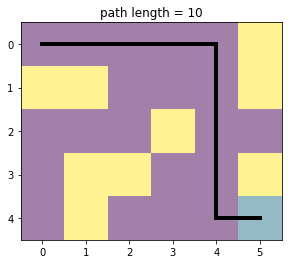

In [5]:
p=bfs_search(grid)
print "success", len(p)>0
plot_map(grid, p)

# Depth First Search

This is **depth first**. We simply use the other way around.

- Does it give the best answer?
- How is its computational complexity as compared with  BFS?

In [6]:
from collections import deque

def dfs_search(grid, verbose=True):
    n_iterations   = 0
    max_queue_len  = 0
    start = (0, 0)
    queue = deque([([], start)])
    visited = set()
    while queue:
        n_iterations += 1
        max_queue_len = max_queue_len if len(queue) < max_queue_len else len(queue)
        path, (y,x) = queue.pop()
        if grid[y][x] == c.TARGET:
            if verbose:
                print "n_iterations %d, max_queue_len %d"%(n_iterations, max_queue_len)
            return path+[(y,x)]
        if (y,x) in visited:
            continue
        visited.add((y,x))
        moves = [ [y,x+1], [y-1,x], [y,x-1], [y+1,x]]
        for move in moves:
            my,mx = move
            if mx>=0 and mx<len(grid[0]) and my>=0 and my<len(grid) and grid[my][mx]!=c.WALL:                
                queue.append((path + [(y,x)], move))
    return []

n_iterations 35, max_queue_len 15
success True


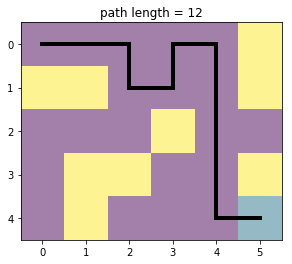

In [7]:
p=dfs_search(grid)
print "success", len(p)>0
plot_map(grid, p)

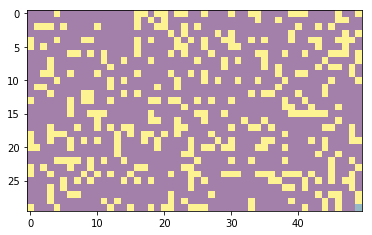

In [8]:
def generate_maze(size):
    grid = (np.random.random(size=size)>.8)*1
    grid = [[c.WALL if grid[x,y] else c.EMPTY for y in range(grid.shape[1])] for x in range(grid.shape[0])]
    grid[-1][-1]=c.TARGET
    return grid
grid = generate_maze(size=(30,50))
plot_map(grid)

n_iterations 3432, max_queue_len 102
success True
1 loop, best of 3: 336 ms per loop


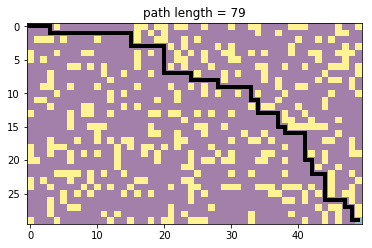

In [9]:
p_bfs = bfs_search(grid)
print "success", len(p_bfs)>0
%timeit bfs_search(grid, verbose=False)
plot_map(grid, p_bfs)

n_iterations 1924, max_queue_len 1046
success True
1 loop, best of 3: 357 ms per loop


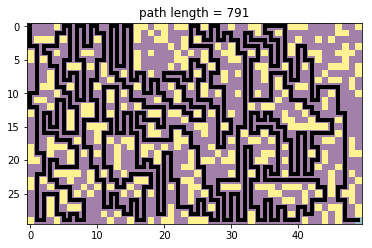

In [10]:
p_dfs = dfs_search(grid)
print "success", len(p_dfs)>0
%timeit dfs_search(grid, verbose=False)
plot_map(grid, p_dfs)

### let's shorten the answer of DFS

- is it now the best answer?

In [11]:
pp = np.r_[p_dfs]
i=0
while i<len(pp):
    for k in range(i+2, len(pp)):
        if np.sum(np.abs(pp[i]-pp[k]))==1:
            pp = np.concatenate((pp[:i+1], list(pp[k:])))
            break
    i+=1

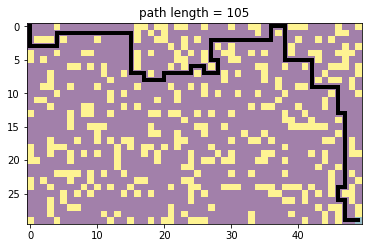

In [12]:
plot_map(grid, pp)

observe computing times. larger mazes makes DFS more iterations (but slower due to data structures which should be improved)

In [14]:
grid = generate_maze(size=(10,20))
%timeit bfs_search(grid, verbose=False)
%timeit dfs_search(grid, verbose=False)

print "bfs solution len", len(bfs_search(grid))
print "dfs solution len", len(dfs_search(grid))

10 loops, best of 3: 25.5 ms per loop
100 loops, best of 3: 21.5 ms per loop
bfs solution len n_iterations 439, max_queue_len 37
29
dfs solution len n_iterations 270, max_queue_len 139
117


In [15]:
grid = generate_maze(size=(20,30))
%timeit bfs_search(grid, verbose=False)
%timeit dfs_search(grid, verbose=False)

print "bfs solution len", len(bfs_search(grid))
print "dfs solution len", len(dfs_search(grid))

10 loops, best of 3: 98.5 ms per loop
10 loops, best of 3: 73.9 ms per loop
bfs solution len n_iterations 1570, max_queue_len 72
49
dfs solution len n_iterations 903, max_queue_len 486
337


In [16]:
grid = generate_maze(size=(50,50))
%timeit bfs_search(grid, verbose=False)
%timeit dfs_search(grid, verbose=False)

print "bfs solution len", len(bfs_search(grid))
print "dfs solution len", len(dfs_search(grid))

1 loop, best of 3: 357 ms per loop
1 loop, best of 3: 322 ms per loop
bfs solution len n_iterations 6224, max_queue_len 171
99
dfs solution len n_iterations 3574, max_queue_len 1560
1111


**exercise A* algorithm**